In [1]:
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

In [2]:
ee.Initialize()

Map = geemap.Map(center=[40,-100], zoom=4)

#Datasets to test on:
daymet_ga = ee.ImageCollection('NASA/ORNL/DAYMET_V4')

In [3]:
#Adding wetlands 

#GCE domain:
gce_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GCE_domain.shp'
gce_lter = 'C:/Users/arj26323/Documents/Data/LTER shapefiles/GCE - Sapelo/GCE_LTER_boundary.shp'

lter = geemap.shp_to_ee(gce_lter)
wet_ga = geemap.shp_to_ee(gce_clip)
dmclip_ga = daymet_ga.map(lambda image: image.clip(wet_ga))

#Flux tower
#Note 1/18/23: Flux tower footprint (fluxproper) OR expanded flux area (fluxdiss)
gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'
gce_fluxproper = 'F:/Wetlands shapefiles/GCE flux tower/sapelo_yearly_climatology-2019.shp'
flux_ga = geemap.shp_to_ee(gce_fluxproper)

# Map.addLayer(dmclip_ga, {}, 'Daymet')

clip_0 = ee.Image(dmclip_ga.toList(dmclip_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

Map.addLayer(clip_0, {}, 'Daymet')
Map.addLayer(lter, {}, 'GCE')

Map.addLayer(flux_ga, {}, 'Flux tower footprint')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [4]:
# clip_0.getInfo()

In [5]:
# #GCE domain:
# est_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_estuaries.shp'
# est_ga = geemap.shp_to_ee(est_clip)
# c2_ga = daymet_ga.map(lambda image: image.clip(est_ga))

# x_0 = ee.Image(c2_ga.toList(c2_ga.size()).get(0)) ##Fist image in collection - need to specify date ranges

# Map.addLayer(x_0, {}, 'Daymet')

In [6]:
#Map of flux tower and GCE
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as ctx

states = gpd.read_file('F:/US states/cb_2018_us_state_20m.shp').to_crs(3857) #Web mercator
states.crs

gce = gpd.read_file(gce_lter).to_crs(3857)
flux = gpd.read_file(gce_fluxproper).to_crs(3857)

p = gpd.GeoSeries(shapely.geometry.Point(31.3894, -81.2836), crs="epsg:4326").to_crs(3857)

fig, ax = plt.subplots (figsize = (12,12), alpha = 0.5, edgecolor = 'black')
states[states['NAME'] == 'Georgia'].boundary.plot(ax = ax, edgecolor = 'black')
gce.boundary.plot(ax = ax, edgecolor = 'red')
# flux.plot(ax = ax)

ctx.add_basemap(ax, zoom = 8, source=ctx.providers.Stamen.TonerLite)

# p.plot(ax = ax, marker_type = "marker")

from matplotlib_scalebar.scalebar import ScaleBar

ax.add_artist(ScaleBar(
    dx=1,
    units="km",
     dimension="si-length",
     length_fraction=0.25,
    scale_formatter=lambda value, unit: f' {value * 1000} km ',
    location='lower left'
))
ax.set_yticks([])
ax.set_xticks([])


NameError: name 'shapely' is not defined

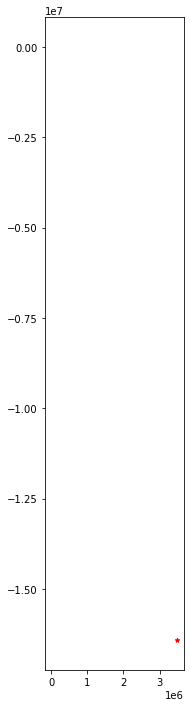

In [62]:
# fig, ax = plt.subplots (figsize = (12,12), alpha = 0.5, edgecolor = 'black')
# axins = zoomed_inset_axes(ax, 2, loc=1)
# minx,miny,maxx,maxy =  ga_state.total_bounds
# axins.set_xlim(minx, maxx)
# axins.set_ylim(miny, maxy)

# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# plt.show()


# Create a base map of Georgia
ax = ga_state.plot(figsize = (12,12), color='blue', edgecolor='black')

# Add the coastal location as a point
coastal_location = p
coastal_location.plot(ax=ax, marker='*', color='red', markersize=20)

# Show the map
plt.show()

In [30]:
import folium
from folium.plugins import BeautifyIcon

# Make an empty map
m = folium.Map(location=[31.3894, -81.2836], tiles="OpenStreetMap", zoom_start=7)

ga_state = states[states['NAME'] == 'Georgia'].boundary

# star marker
icon_star = BeautifyIcon(
    icon='star',
    inner_icon_style='color:gold;font-size:30px;',
    background_color='transparent',
    border_color='transparent',
)

folium.Marker([31.3894, -81.2836], tooltip='star', icon=icon_star).add_to(m)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

m

# m.save('markers_on_folium_map.html')

In [69]:
#Map of flux tower and FLATS - average for year, or specific date? Which Landsat sensor?
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

ee.Initialize()

Map = geemap.Map(center=[31.539096,-81.422318], zoom=10)

gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'

gce_fluxproper = 'F:/Wetlands shapefiles/GCE flux tower/sapelo_yearly_climatology-2019.shp'

gce = gpd.read_file(gce_lter).to_crs(3857)
aoi = gpd.read_file(gce_fluxproper).to_crs(3857)

flux_ga = geemap.shp_to_ee(gce_fluxproper)

In [72]:
def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

##Function to cloud mask from the pixel_qa band of Landsat 5/8 SR data.
def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

l7_col = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL7)

In [ ]:
import geemap
import geopandas as gpd

# Load the shapefile of the area of interest
area_of_interest = gpd.read_file("path/to/shapefile.shp")

# Initialize the Google Earth Engine (GEE)
geemap.show_youtube()

# Define the Landsat dataset
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

# Define the date range and location
date_range = ee.DateRange('2018-01-01', '2018-12-31')
location = area_of_interest.geometry.iloc[0]

# Filter the image collection to the area of interest and date range
filtered_collection = landsat.filterBounds(location).filterDate(date_range)

# Select the image with the least cloud cover
cloud_cover = ee.Image(filtered_collection.sort("CLOUD_COVER").first())

# Create a false color composite using bands 4,3,2
false_color = cloud_cover.select("B4","B3","B2").divide(10000)

# Clip the image to the area of interest
clipped_image = false_color.clip(location)

# Display the clipped image on geemap
geemap.add_ee_layer(clipped_image, {'min':0, 'max':1}, 'False color composite')
geemap.add_ee_layer(area_of_interest, {"color": "green"}, "Area of interest")

# Center the map on the area of interest
geemap.center_map(location)

In [21]:
#Map of GCE and FLATS - average for year, or specific date? Which Landsat sensor?

##FLATS
def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL5(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.972*(RED-SWIR)/(RED+SWIR)-0.008) - 41.2*(0.991*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)-0.0014)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))


def addFLATSL8(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.841*(RED-SWIR)/(RED+SWIR) - 0.019) - 41.2*(0.771*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1) + 0.011)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL9(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(1.225*(RED-SWIR)/(RED+SWIR) + 0.096) - 41.2*(1.038* (NIR-RED)/(NIR+6*RED-7.5*BLUE+1) - 0.004)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

#Note on landsat 9: calibrated to L7 - originally calibrated to L8

#Flats equation when evi is subbed in: flats = 1.51+(-41.2*evi) + 12.5*ndwi

##MASKING FLATS
def maskFLATS(image):
    mask1 = image.select('flats').lte(0.1) #less than or equal to 0.1 - change?
    return image.updateMask(mask1)

##Function to cloud mask from the pixel_qa band of Landsat 5/8 SR data.
def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

#ndvi - before and after applying FLATs
##ADDING NDVI (for min/max variables)
def addL5ndvi(image):
    ndvi = image.expression(
        '(NIR-RED)/(RED+NIR)', {
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2')
        })
    
    return image.addBands(ndvi.rename('ndvi'))

def addL8ndvi(image):
    ndvi = image.expression(
        '(NIR-RED)/(RED+NIR)', {
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3')
        })
    
    return image.addBands(ndvi.rename('ndvi'))

#Mapping a continuous time series using calibrated data

l8_col = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga) \
    .map(maskL5sr).map(addFLATSL8).map(addL8ndvi)

l7_col = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL7).map(addL5ndvi)

l5_col = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL5).map(addL5ndvi)

l9_col = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(flux_ga)\
    .map(maskL5sr).map(addFLATSL9).map(addL8ndvi)

L5_1 = l5_col.first()
L7_1 = l7_col.first()
L8_1 = l8_col.first()
L9_1 = l9_col.first()

In [22]:
yearlist_7 = l7_col.toList(l7_col.size())
x = ee.Image(yearlist_7.get(30))
Map.addLayer(x, {'bands': ['flats'], 'min': 0, 'max': 1}, 'Flats L7')
Map

Map(bottom=1711189.0, center=[31.44440806652998, -81.28355026245119], controls=(WidgetControl(options=['positi…

In [23]:
x.getInfo()

{'type': 'Image',
 'bands': [{'id': 'SR_B1',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7841, 7081],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 430485, 0, -30, 3618315]},
  {'id': 'SR_B2',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7841, 7081],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 430485, 0, -30, 3618315]},
  {'id': 'SR_B3',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7841, 7081],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 430485, 0, -30, 3618315]},
  {'id': 'SR_B4',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -0.2,
    'max': 1.6022125},
   'dimensions': [7841, 7081],
   'crs': 'EPSG:32617',
   'crs_transform': [30, 0, 430485, 0, -30, 3618315]},
  {'id': 'SR_B5',
   'data_type': {'type'